#ECommerce_consumer behaviour

## Prequesite
<b> Download datasets from kaggle using kaggle Api 
</b>

In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d hunter0007/ecommerce-dataset-for-predictive-marketing-2023

 99% 15.0M/15.2M [00:01<00:00, 19.5MB/s]
100% 15.2M/15.2M [00:01<00:00, 11.9MB/s]


In [5]:
! unzip  /content/ecommerce-dataset-for-predictive-marketing-2023.zip

Archive:  /content/ecommerce-dataset-for-predictive-marketing-2023.zip
  inflating: ECommerce_consumer behaviour.csv  


## Introduction 
**The dataset consists of over 2 million purchase records at a renowned Hunter's supermarket**

Supermarket consumer behaviour dataset consists of 2019501 Rows & 12 Columns :

1. order_id – (A unique number to identity the order)

2. user_id - (A unique number to identify the user)

3. order_number – (Number of the order)

4. order_dow – (Day of the Week the order was made)
5. orderhourof_day – (Time of the order)
6. dayssinceprior_order - (History of the order)
7. product_id – (Id of the product)
8. addtocart_order – (Number of items added to cart)
9. reordered – (If the reorder took place)
10. department_id - (Unique number allocated to each department)
11. department – (Names of the departments)
12. product_name – (Name of the products)

## Motive
**with the Knowledge of customer previous exprience uniquely identified by their user id we can show add of product based on their time of the day ,week day  and their previous order time etc**

## Libraries 


`pandas` *for reading dataset*

`KNNImputer` *for imputing missing value*

In [6]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

***Dataset loading***

In [7]:
df = pd.read_csv("/content/ECommerce_consumer behaviour.csv")

In [8]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [9]:
#order_id is just a serial number for every order dropping will help in better data understanding 
df.drop("order_id",axis=1,inplace = True)

## Dataset Description 


In [10]:
df.describe() #pandas `function` for dataframe description 

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   order_number            int64  
 2   order_dow               int64  
 3   order_hour_of_day       int64  
 4   days_since_prior_order  float64
 5   product_id              int64  
 6   add_to_cart_order       int64  
 7   reordered               int64  
 8   department_id           int64  
 9   department              object 
 10  product_name            object 
dtypes: float64(1), int64(8), object(2)
memory usage: 169.5+ MB


*Eight columns are Numerical*

*last two columns are categorical*

####Handling NUll values in the dataset

In [12]:
df.isnull().sum()

user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [13]:
df["days_since_prior_order"].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

``` since **days_since_prior_order** column has  124342 rows of null values and we cant afford to loose that many rows ,Also it looks an important character to analyze After how many many a customer reordered```
> Filling Missing value

```As 0 is also a unique value of the the dataset column so we can't fill  NULL value with zero.Try with Imputation for completing missing values using k-Nearest Neighbors.
Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.```


In [14]:
imp =IterativeImputer(random_state=0)

In [15]:
df_handled_missing_value = imp.fit_transform(df.loc[:,"user_id":"department_id"])#return ndarray data columns 
df_without_categorical_value = pd.DataFrame(df_handled_missing_value)#tranform them to dataframe 

In [16]:
df_imputed = pd.concat([df_without_categorical_value,df[["department","product_name"]]],axis=1)#concat along axis 1
df_imputed.columns= df.columns#set columns

In [17]:
df_imputed

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,49125.0,1.0,2.0,18.0,14.500439,17.0,1.0,0.0,13.0,pantry,baking ingredients
1,49125.0,1.0,2.0,18.0,14.650857,91.0,2.0,0.0,16.0,dairy eggs,soy lactosefree
2,49125.0,1.0,2.0,18.0,14.626121,36.0,3.0,0.0,16.0,dairy eggs,butter
3,49125.0,1.0,2.0,18.0,14.787803,83.0,4.0,0.0,4.0,produce,fresh vegetables
4,49125.0,1.0,2.0,18.0,14.842010,83.0,5.0,0.0,4.0,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...
2019496,199430.0,16.0,3.0,18.0,5.000000,83.0,8.0,0.0,4.0,produce,fresh vegetables
2019497,128787.0,42.0,2.0,19.0,3.000000,115.0,1.0,1.0,7.0,beverages,water seltzer sparkling water
2019498,128787.0,42.0,2.0,19.0,3.000000,32.0,2.0,1.0,4.0,produce,packaged produce
2019499,128787.0,42.0,2.0,19.0,3.000000,32.0,3.0,1.0,4.0,produce,packaged produce


### Data Visualization

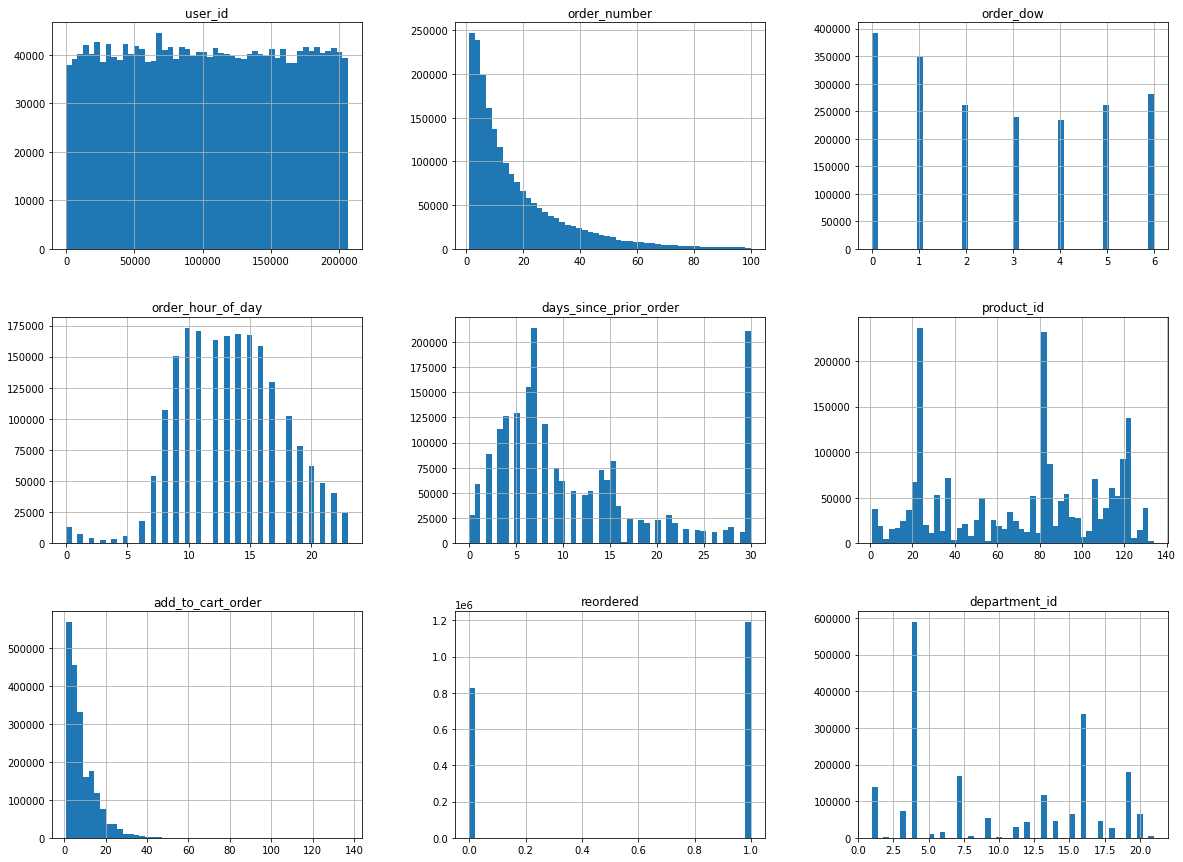

In [18]:
%matplotlib inline
df_imputed.hist(bins=50, figsize=(20,15))
plt.show()

**Two columns `add_to_cart_order` and  `order_no` are left skewed data to make them normally distributed we have to apply logarithmic transformation on them**

In [19]:
def make_pie(column):
    values = df_imputed[column].value_counts()
    plt.pie(values.values,labels = values.index,shadow = True,radius=3,autopct='%1.2f%%')

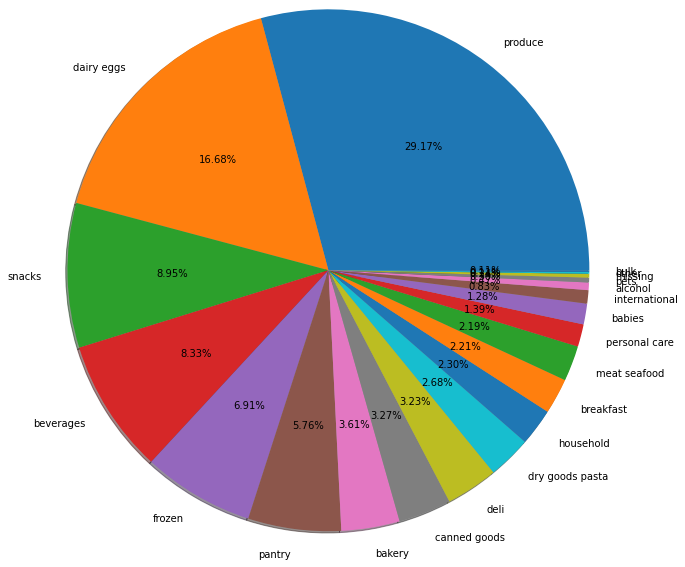

In [20]:
make_pie('department')

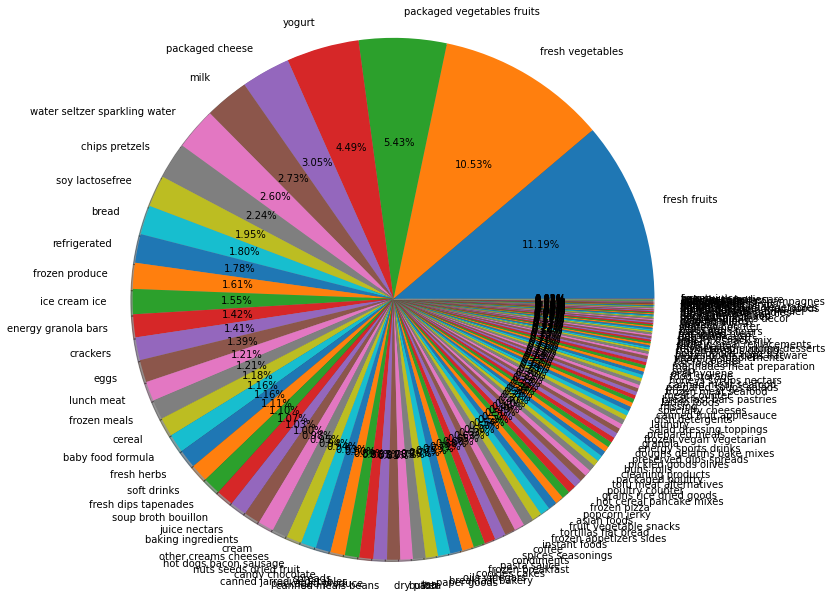

In [21]:
make_pie('product_name')

#### Feature creation
convert `day_of_order` to week days 

In [22]:
days = {0.0:'Mon',1.0:'Tues',2.0:'Weds',3.0:'Thurs',4.0:'Fri',5.0:'Sat',6.0:'Sun'}
df_imputed["day_of_order"] = df_imputed["order_dow"].apply(lambda x : days[x])

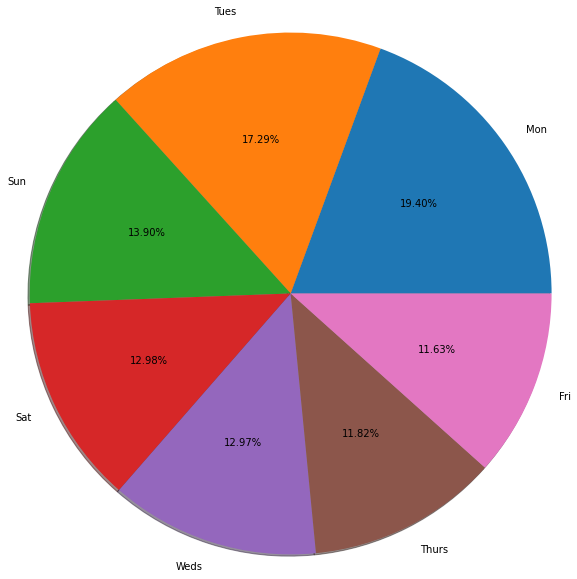

In [23]:
make_pie('day_of_order')

*Majority of the order are placed in start of the week days*

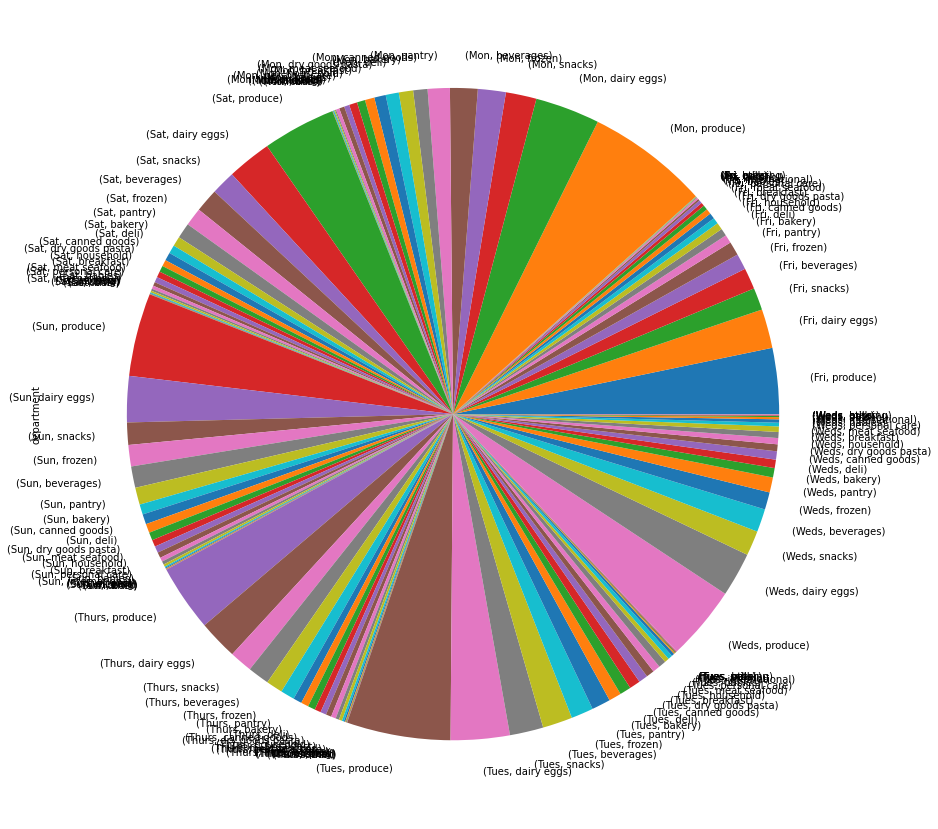

In [24]:
df_imputed.groupby('day_of_order')["department"].value_counts().plot(kind="pie",figsize=(30,15))

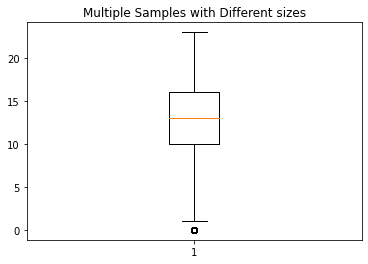

In [25]:
fig, ax = plt.subplots()
ax.set_title('Multiple Samples with Different sizes')
ax.boxplot(df_imputed['order_hour_of_day'])

plt.show()

####  Transforming the data 

In [26]:
df_imputed["order_number"] =  np.log(df_imputed["order_number"])
df_imputed["days_since_prior_order"] =  np.log(df_imputed["days_since_prior_order"]+1)
df_imputed["add_to_cart_order"] =  np.log(df_imputed["add_to_cart_order"]+1)

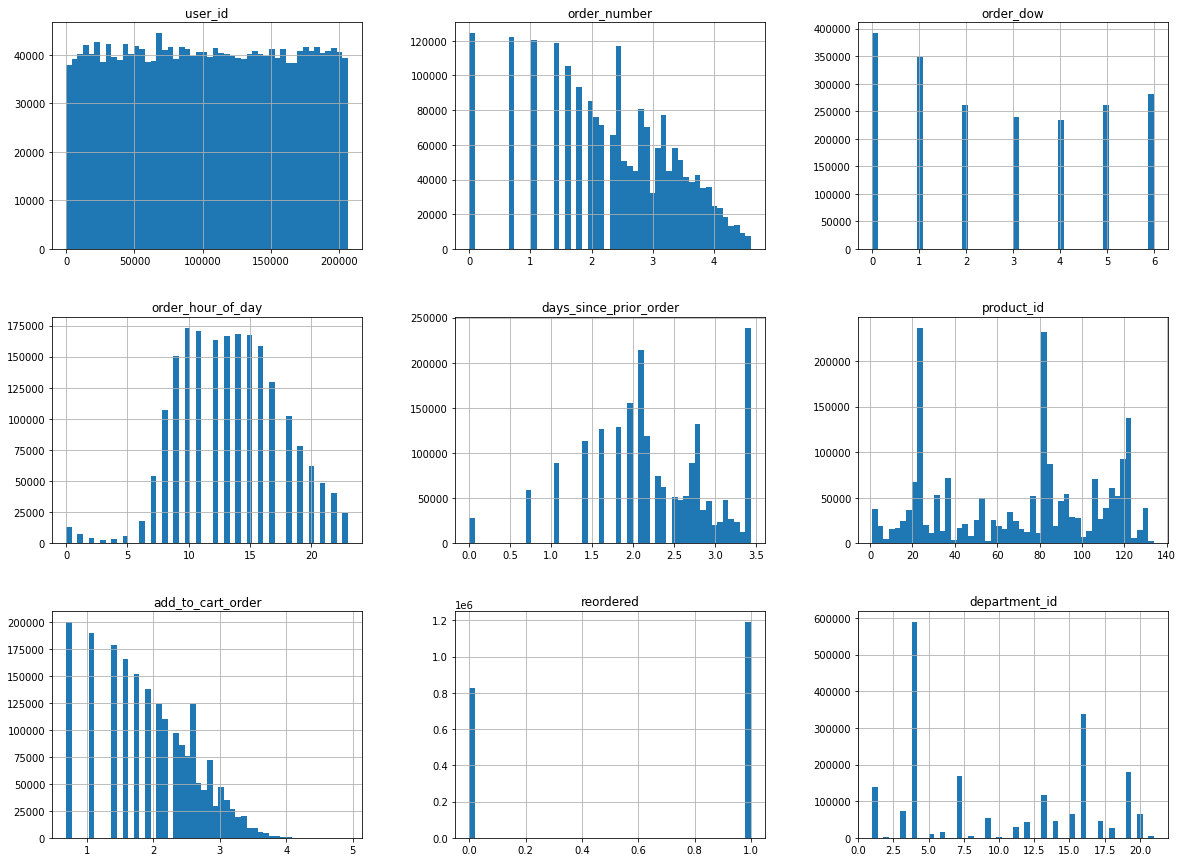

In [27]:
df_imputed.hist(bins=50, figsize=(20,15))
plt.show()

### Datset Description conclusion 

*the dataset shows most of the purchases are made on start of the week in days time also*

#### Target data

In [28]:
target = df_imputed["product_name"]
feature = df_imputed.drop(["product_id","department_id","product_name","department"],axis=1)#it correlates highly with target


In [29]:
x_train,x_test,y_train,y_test = train_test_split(feature,target)

#### Modeling 

In [31]:
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.0/216.0 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [32]:
from flaml import AutoML
automl_log = AutoML()

In [33]:
automl_log.fit(x_train, y_train, task="classification",metric='log_loss',time_budget=60,estimator_list = ['lgbm'],n_splits=5)

check Spark installation...This line should appear only once.

        and check [here](https://spark.apache.org/docs/latest/api/python/getting_started/install.html)
        for more details about installing Spark.


[flaml.automl.automl: 01-04 17:18:54] {2712} INFO - task = classification
[flaml.automl.automl: 01-04 17:18:54] {2714} INFO - Data split method: stratified
[flaml.automl.automl: 01-04 17:18:54] {2717} INFO - Evaluation method: holdout
[flaml.automl.automl: 01-04 17:18:55] {2844} INFO - Minimizing error metric: log_loss
[flaml.automl.automl: 01-04 17:18:55] {2990} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.automl: 01-04 17:18:55] {3319} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 01-04 17:18:57] {3457} INFO - Estimated sufficient time budget=2528923s. Estimated necessary time budget=2529s.
[flaml.automl.automl: 01-04 17:18:57] {3504} INFO -  at 6.6s,	estimator lgbm's best error=4.0058,	best estimator lgbm's best error=4.0058
[flaml.automl.automl: 01-04 17:18:57] {3319} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 01-04 17:18:59] {3504} INFO -  at 8.2s,	estimator lgbm's best error=4.0058,	best estimator lgbm's best error=4.0058
[

In [34]:
print('Best log_loss on validation data: {0:.4g}'.format(automl_log.best_loss))

Best log_loss on validation data: 3.968


Text(0.5, 1.0, 'Feature Importance')

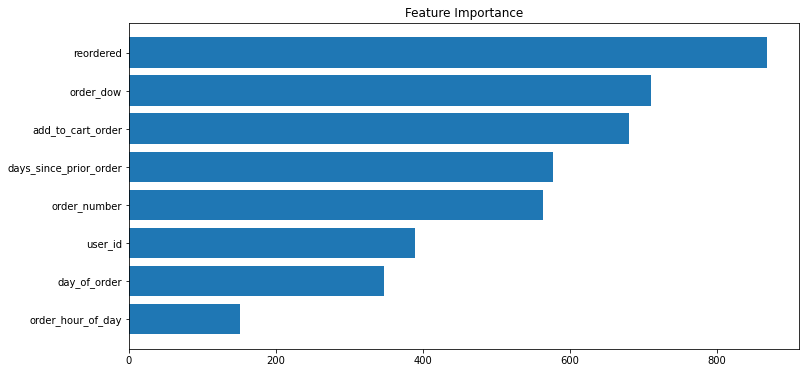

In [35]:
import numpy as np
feature_importance = automl_log.feature_importances_
sorted_idx = np.argsort(feature_importance)[-25:]
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x_train.columns)[sorted_idx])
plt.title('Feature Importance')

In [36]:
automl_log.predict(x_test)

array(['fresh vegetables', 'fresh fruits', 'fresh vegetables', ...,
       'fresh vegetables', 'fresh fruits', 'fresh vegetables'],
      dtype=object)

In [38]:
import pickle
with open('model.pkl','wb') as files:
    pickle.dump(automl_log,files)